# Import

In [1]:
import sys
from datetime import datetime

root_dir = '../../../'
if root_dir not in sys.path:
    sys.path.append(root_dir)
    
import matplotlib.pyplot as plt

from modules import datasets

# Output Settings

In [2]:
out_to_file = True
out_dir = '../../out/longtail/ml_20m/'

# Dataset

In [3]:
dataset = datasets.ML20m()
tail_threshold = 20

# Data processing

In [4]:
# Sort df_items by feedback_num in descending order
sorted_df = dataset.item_popularity_data().sort_values(by='feedback_num', ascending=False)

# Number of items in the top X%
n_head_items = int(tail_threshold * len(sorted_df) / 100)

# Get default colors from matplotlib palette
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
head_color = default_colors[0]
tail_color = default_colors[1]

# Specify colors for items in the top X% and the rest
colors = [head_color if i < n_head_items else tail_color for i in range(len(sorted_df))]

In [5]:
max_feedback_num = sorted_df['feedback_num'].max()
print(f'max(feedback_num) = {max_feedback_num}')

x = 20000
n_items_above_x = sorted_df[sorted_df['feedback_num'] > x].shape[0]
print(f'The number of items that have more than {x} feedbacks = {n_items_above_x}')

n_no_fb_items = sorted_df[sorted_df['feedback_num'] == 0].shape[0]
print(f'The number of items that have no feedbacks = {n_no_fb_items}')

max(feedback_num) = 55764
The number of items that have more than 20000 feedbacks = 50
The number of items that have no feedbacks = 0


# Result

## Default

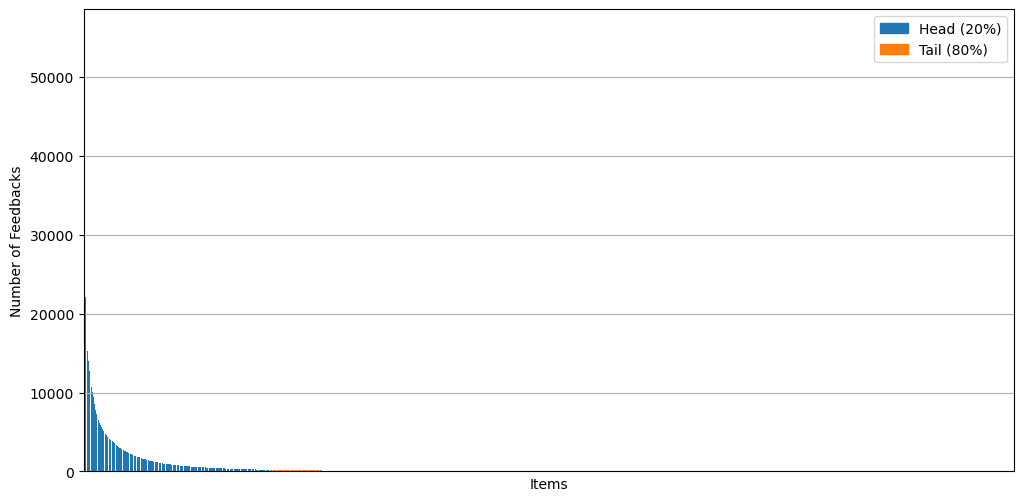

In [6]:
# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_df)), sorted_df['feedback_num'], color=colors)
plt.xlabel('Items')
plt.ylabel('Number of Feedbacks')
plt.grid(axis='y')
plt.xlim(0, len(sorted_df))
plt.xticks([])

# Creating custom handles for the legend
head_handle = plt.Rectangle((0, 0), 1, 1, color=head_color)
tail_handle = plt.Rectangle((0, 0), 1, 1, color=tail_color)
plt.legend(
    handles=[head_handle, tail_handle],
    labels=[f'Head ({tail_threshold}%)', f'Tail ({100 - tail_threshold}%)']
)

if out_to_file:
    now = datetime.now()
    file_name = now.strftime("default_%Y_%m_%d_%H%M.png")
    plt.savefig(out_dir + file_name)

plt.show()

## Logarithmic

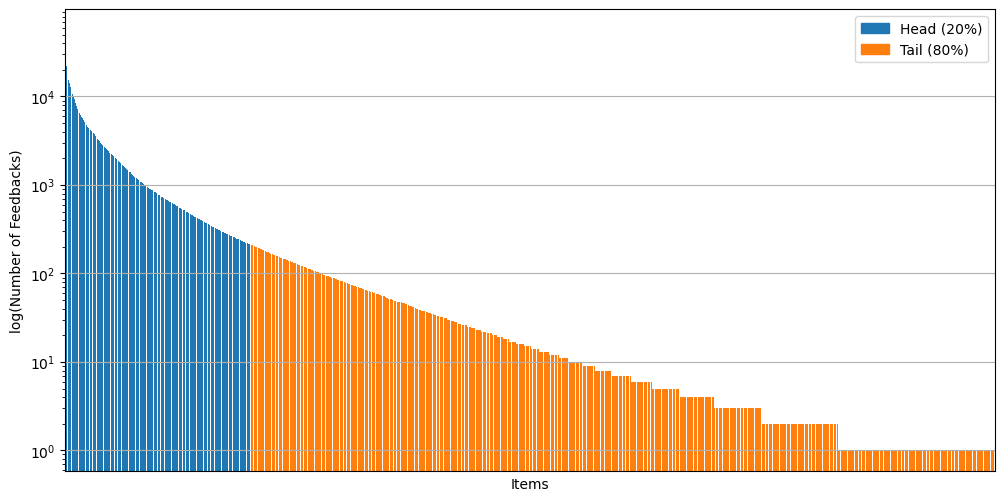

In [7]:
# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_df)), sorted_df['feedback_num'], color=colors)
plt.xlabel('Items')
plt.ylabel('log(Number of Feedbacks)')
plt.yscale('log')
plt.grid(axis='y')
plt.xlim(0, len(sorted_df))
plt.xticks([])

# Creating custom handles for the legend
head_handle = plt.Rectangle((0, 0), 1, 1, color=head_color)
tail_handle = plt.Rectangle((0, 0), 1, 1, color=tail_color)
plt.legend(
    handles=[head_handle, tail_handle],
    labels=[f'Head ({tail_threshold}%)', f'Tail ({100 - tail_threshold}%)']
)

if out_to_file:
    now = datetime.now()
    file_name = now.strftime("logarithmic_%Y_%m_%d_%H%M.png")
    plt.savefig(out_dir + file_name)

plt.show()